In [694]:
# import stuff here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import itertools


# Import mosquitoes data

In [597]:
mosq = pd.read_csv('../data/ovitrap_data_monthly_province.csv').sort_values(['adm_level', 'date'])

In [598]:
mosq.head()

,adm_level,date,count_ovi,mean_ovi,error_ovi,error_relative_ovi
7200,Abra,2012-01-01,0.0,NaN,NaN,NaN
7201,Abra,2012-02-01,0.0,NaN,NaN,NaN
7202,Abra,2012-03-01,0.0,NaN,NaN,NaN
7203,Abra,2012-04-01,0.0,NaN,NaN,NaN
7204,Abra,2012-05-01,0.0,NaN,NaN,NaN


In [599]:
mosq['date'] = pd.to_datetime(mosq.date).dt.date
mosq.loc[mosq.count_ovi>0].groupby('adm_level', as_index=False).sum().sort_values('count_ovi', ascending=False).head()

,adm_level,count_ovi,mean_ovi,error_ovi,error_relative_ovi
65,Pangasinan,9615.0,1384.900412,195.895837,8.466437
10,Batangas,6632.0,1160.544314,132.908643,7.757148
66,Quezon,6378.0,1104.754133,126.427465,4.009551
64,Pampanga,5146.0,464.914480,91.345518,6.637146
38,Iloilo,5032.0,1619.130424,161.384422,4.790436


#### We pick the administrative level with the least missing data

In [600]:
df = mosq.loc[(mosq.adm_level == 'Pangasinan')&(mosq.count_ovi>0)].reset_index()

In [601]:
df.rename(mapper={'index':'old_index'}, axis=1, inplace=True)

# Checking for neighboring points

In [602]:
df['next_month'] = df.old_index + 1

In [603]:
df['next_point'] = pd.concat([df.old_index[1:],pd.Series(df.old_index.iloc[-1] + 1)]).reset_index(drop=True)
df['consecutive'] = df.next_point - df.next_month

In [604]:
df

,old_index,adm_level,date,count_ovi,mean_ovi,error_ovi,error_relative_ovi,next_month,next_point,consecutive
0,1350,Pangasinan,2012-07-01,14.0,39.387857,9.259286,0.235080,1351,1354,3
1,1354,Pangasinan,2012-11-01,7.0,4.925714,2.941088,0.597089,1355,1355,0
2,1355,Pangasinan,2012-12-01,5.0,32.540000,16.331001,0.501875,1356,1356,0
3,1356,Pangasinan,2013-01-01,33.0,28.844848,5.559687,0.192745,1357,1357,0
4,1357,Pangasinan,2013-02-01,9.0,45.836667,11.806748,0.257583,1358,1358,0
5,1358,Pangasinan,2013-03-01,2.0,51.070000,13.385531,0.262102,1359,1359,0
6,1359,Pangasinan,2013-04-01,1.0,0.000000,0.000000,NaN,1360,1360,0
7,1360,Pangasinan,2013-05-01,1.0,0.000000,0.000000,NaN,1361,1361,0
8,1361,Pangasinan,2013-06-01,4.0,3.750000,3.247595,0.866025,1362,1362,0
9,1362,Pangasinan,2013-07-01,9.0,43.791111,16.323253,0.372753,1363,1363,0


In [605]:
consecutive = df.iloc[1:43]

In [606]:
consecutive.shape

(42, 10)

#### The train set will be the first 42 consecutive data points (excluding the first one of all).
After that there is a break, since there is no valid data point for 2016-05-01.
The test set will be the data points after that breaking point.

In [607]:
train = consecutive[['date', 'mean_ovi']]
test = df[43:][['date', 'mean_ovi']]
train = pd.DataFrame(train, columns=['date','mean_ovi']).set_index('date')
test = pd.DataFrame(test, columns=['date','mean_ovi']).set_index('date')

In [608]:
train.tail()

,mean_ovi
date,
2015-12-01,22.702072
2016-01-01,25.777059
2016-02-01,20.639329
2016-03-01,16.635726
2016-04-01,29.410000


#### We can see that data for 2016-05-01 is missing. 
We add an empty row to our test dataset. We will exclude this month from the evaluation of our model.

In [609]:
empty = pd.DataFrame()
empty['date'] = pd.Series(['2016-05-01'])
empty['date'] = pd.to_datetime(empty['date']).dt.date
empty['mean_ovi'] = np.nan
empty = pd.DataFrame(empty, columns=['date', 'mean_ovi']).set_index('date')

In [610]:
test = pd.concat([empty, test])
test = test.iloc[:12]
test

,mean_ovi
date,
2016-05-01,NaN
2016-06-01,38.737222
2016-07-01,37.109107
2016-08-01,35.852651
2016-09-01,29.157500
2016-10-01,27.926964
2016-11-01,25.230541
2016-12-01,25.885200
2017-01-01,27.825098


# Baseline model
## Naive method - average of the previous year

In [625]:
test = test.iloc[:12]

In [626]:
train.head()

,mean_ovi,pred
date,,
2012-11-01,4.925714,4.925714
2012-12-01,32.540000,32.540000
2013-01-01,28.844848,28.844848
2013-02-01,45.836667,45.836667
2013-03-01,51.070000,51.070000


In [627]:
pred_year = train.iloc[-12:].mean_ovi.mean()
test['pred'] = pred_year
train['pred'] = train.mean_ovi

In [628]:
test

,mean_ovi,pred
date,,
2016-05-01,NaN,27.788952
2016-06-01,38.737222,27.788952
2016-07-01,37.109107,27.788952
2016-08-01,35.852651,27.788952
2016-09-01,29.157500,27.788952
2016-10-01,27.926964,27.788952
2016-11-01,25.230541,27.788952
2016-12-01,25.885200,27.788952
2017-01-01,27.825098,27.788952


In [629]:
final = pd.concat([train, test])

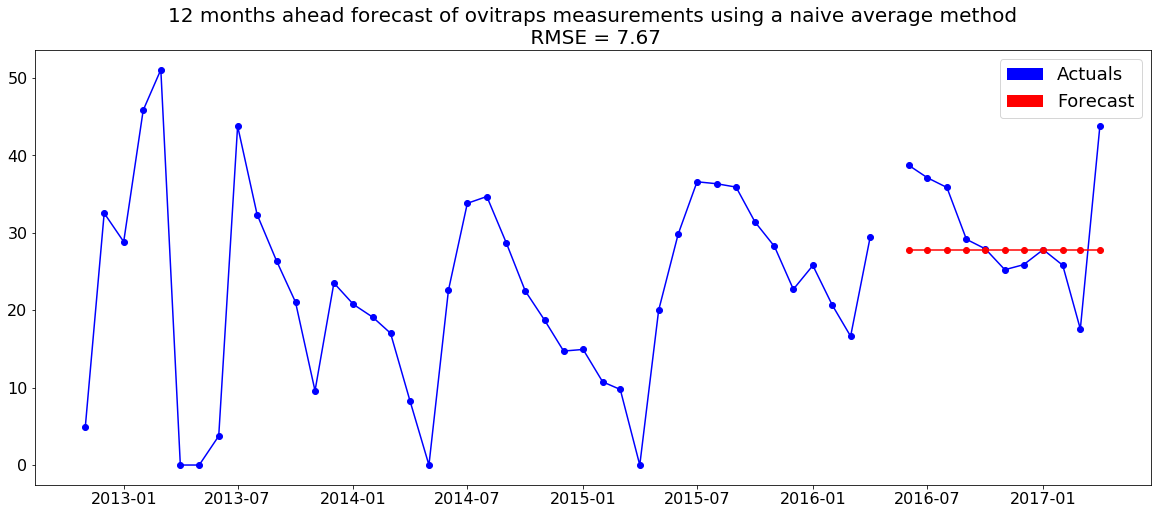

In [630]:
plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(test.iloc[1:].index, test.iloc[1:].pred, color = 'red', label='prediction', marker = 'o')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Actuals', 'Forecast'], loc=1, ncol = 1, prop={'size':18})
l.draw_frame(True)
plt.title('12 months ahead forecast of ovitraps measurements using a naive average method\n RMSE = 7.67', fontdict={'fontsize':20})
plt.tick_params(axis='both', labelsize=16)

In [631]:
np.sqrt(mean_squared_error(test.pred.iloc[1:], test.mean_ovi[1:])) #[1:] to ignore the Null value in May.

7.669568544917436

## Naive method - lag of 12


In [632]:
train.drop('pred', axis=1, inplace=True)
test.drop('pred', axis=1, inplace=True)
test = test.iloc[:12]

In [633]:
pred_year = train.iloc[-12:].mean_ovi
test['pred'] = train.iloc[-12:].mean_ovi.tolist()

In [636]:
train['pred'] = train.mean_ovi
final = pd.concat([train, test])

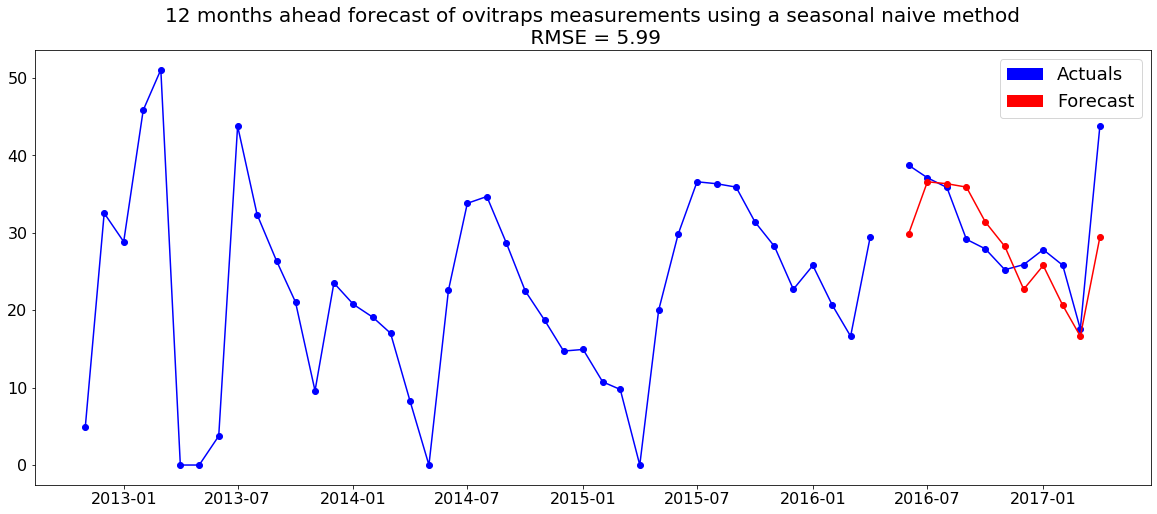

In [637]:
plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(test.iloc[1:].index, test.iloc[1:].pred, color = 'red', label='prediction', marker = 'o')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Actuals', 'Forecast'], loc=1, ncol = 1, prop={'size':18})
l.draw_frame(True)
plt.title('12 months ahead forecast of ovitraps measurements using a seasonal naive method\n RMSE = 5.99', fontdict={'fontsize':20})
plt.tick_params(axis='both', labelsize=16)

In [639]:
np.sqrt(mean_squared_error(test.pred.iloc[1:], test.mean_ovi[1:]))

5.986144907271938

# Exponential smoothing

In [231]:
train.drop('pred', axis=1, inplace=True)
test.drop('pred', axis=1, inplace=True)
test = test.iloc[:12]

In [641]:
# Model parameters
s='add'
p=12
t=None

In [642]:
model = ExponentialSmoothing(np.asarray(train.mean_ovi), trend=t, seasonal=s, seasonal_periods=p)
fit = model.fit()
pred = fit.forecast(test.shape[0]) # +1 to account for the date which is missing from the test (and train) datasets.
train['pred'] = train.mean_ovi
test['pred'] = pred
final = pd.concat([train, test])

RMSE for s = add, t = None and p = 12:   11.7775484638022


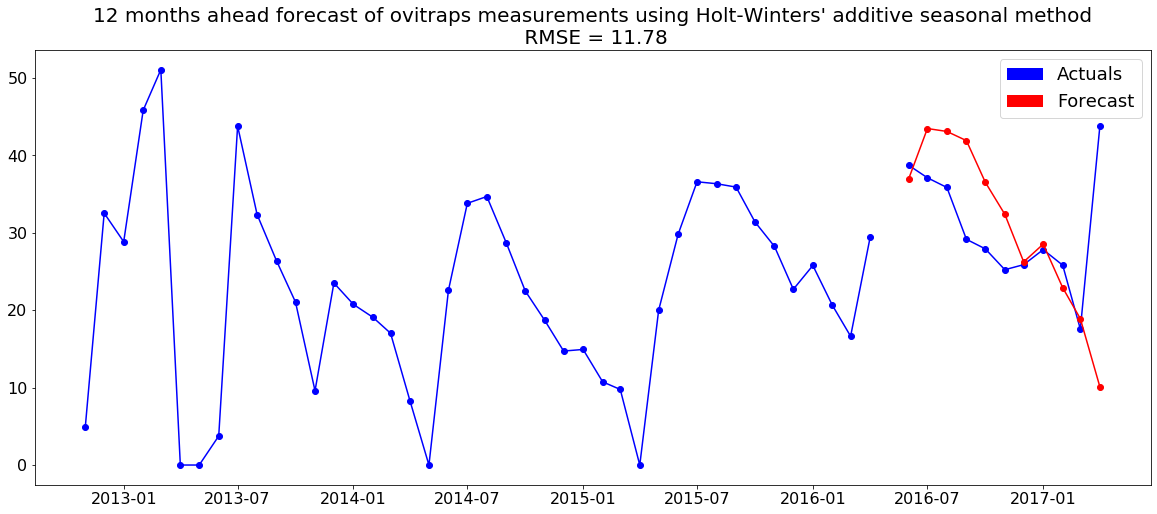

In [643]:
plt.figure()
plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(test.iloc[1:].index, test.iloc[1:].pred, color = 'red', label='prediction', marker = 'o')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Actuals', 'Forecast'], loc=1, ncol = 1, prop={'size':18})
l.draw_frame(True)
plt.title("12 months ahead forecast of ovitraps measurements using Holt-Winters' additive seasonal method\n RMSE = 11.78", fontdict={'fontsize':20})
plt.tick_params(axis='both', labelsize=16)            #
print('RMSE for s = {}, t = {} and p = {}:  '.format(s,t,p), np.sqrt(mean_squared_error(test.pred.iloc[1:], test.mean_ovi[1:]))) #[1:] to ignore the Nan.

# ARIMA
## Seasonal ARIMA model with no regressors

In [644]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

### Decomposing time series in trend and seasonal components

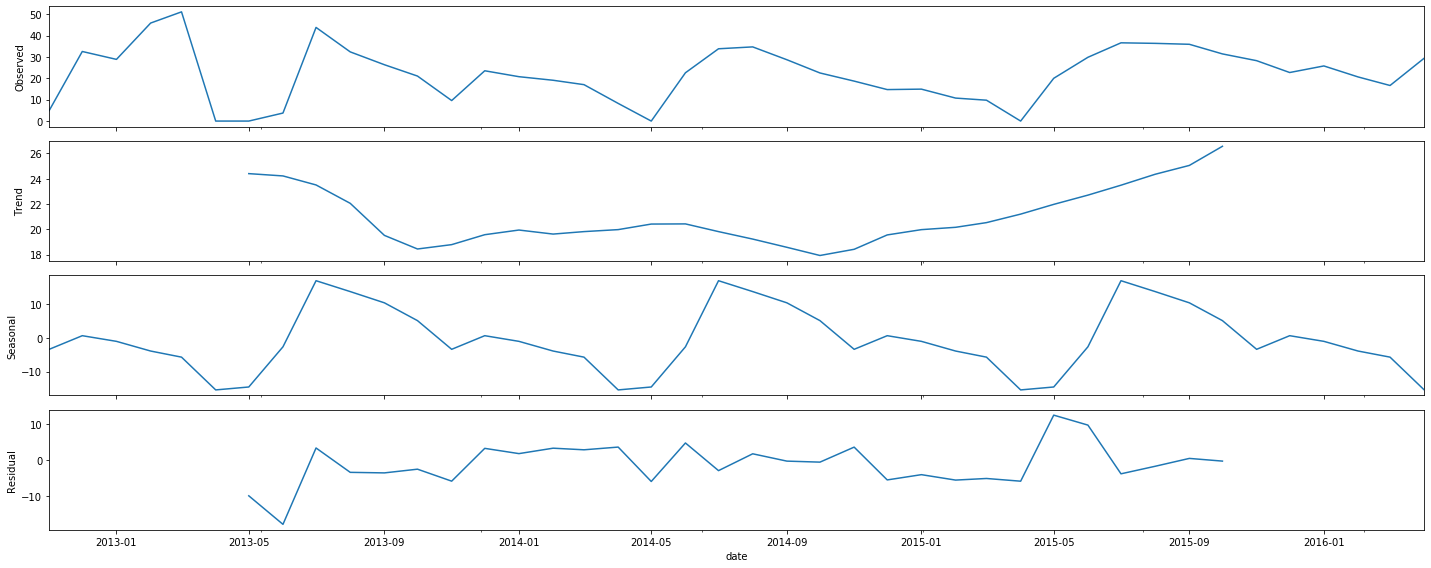

In [656]:
decomp = seasonal_decompose(train.mean_ovi, freq=12)
plots_decomposed = decomp.plot()

## Box-Jenkins model identification

### Identifying coefficients for seasonal component


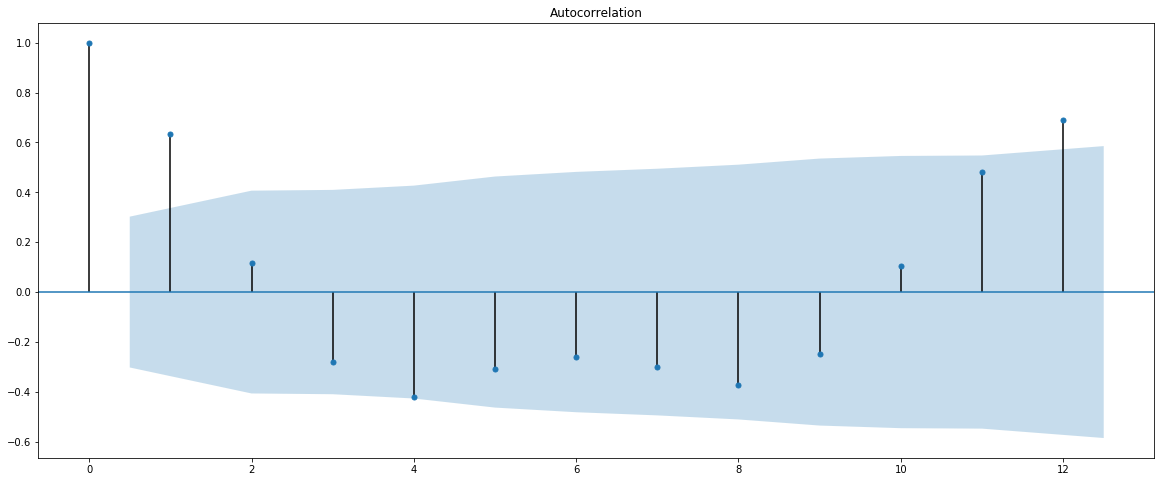

In [654]:
seasonal_acf = plot_acf(decomp.seasonal, lags=12)

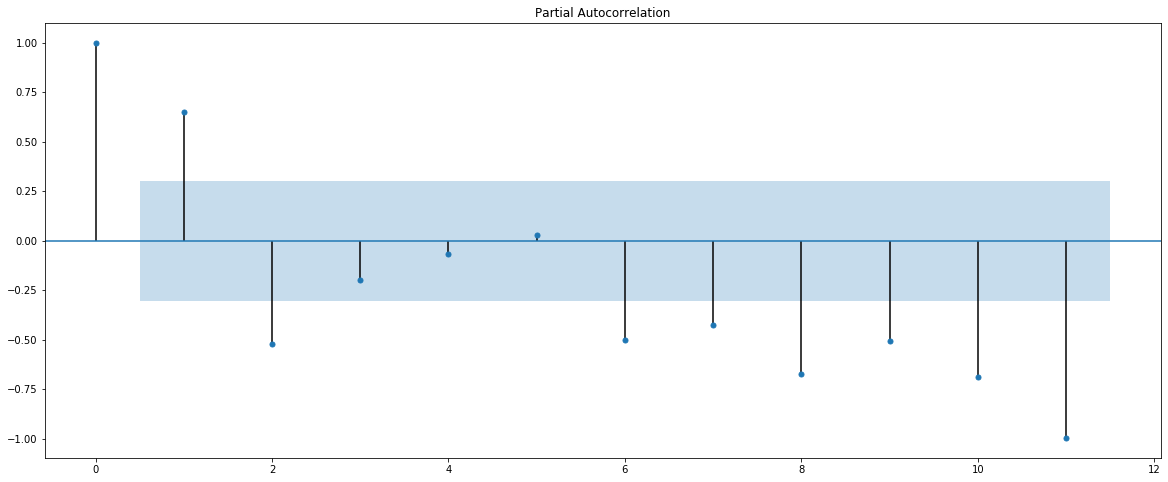

In [658]:
seasonal_pacf = plot_pacf(decomp.seasonal, lags=11)

#### Here, the number of periods in a season is 12.

### Identifying coefficients for time series with seasonality removed

In [257]:
no_season = decomp.observed - decomp.seasonal

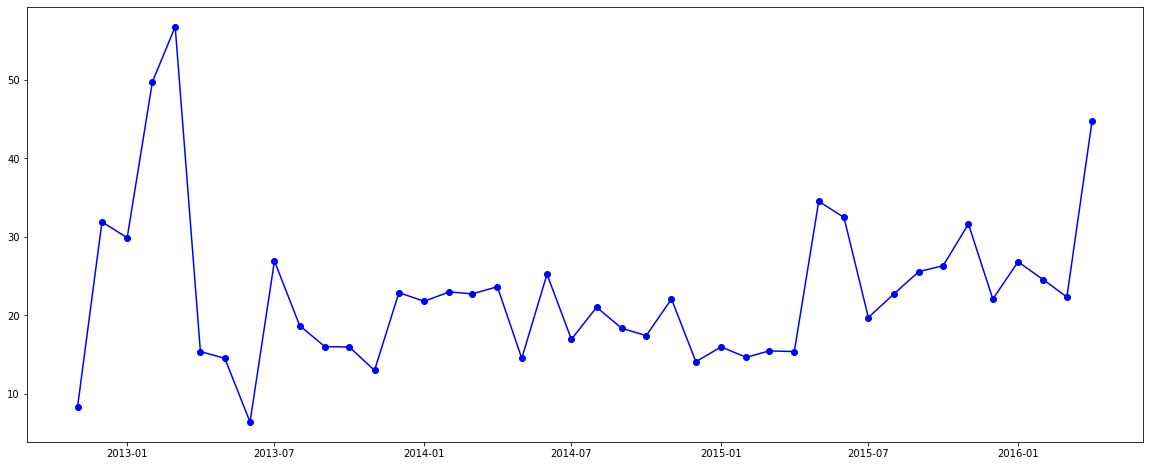

In [661]:
plt.plot(no_season.index, no_season.values, color = 'blue', label='real', marker = 'o')

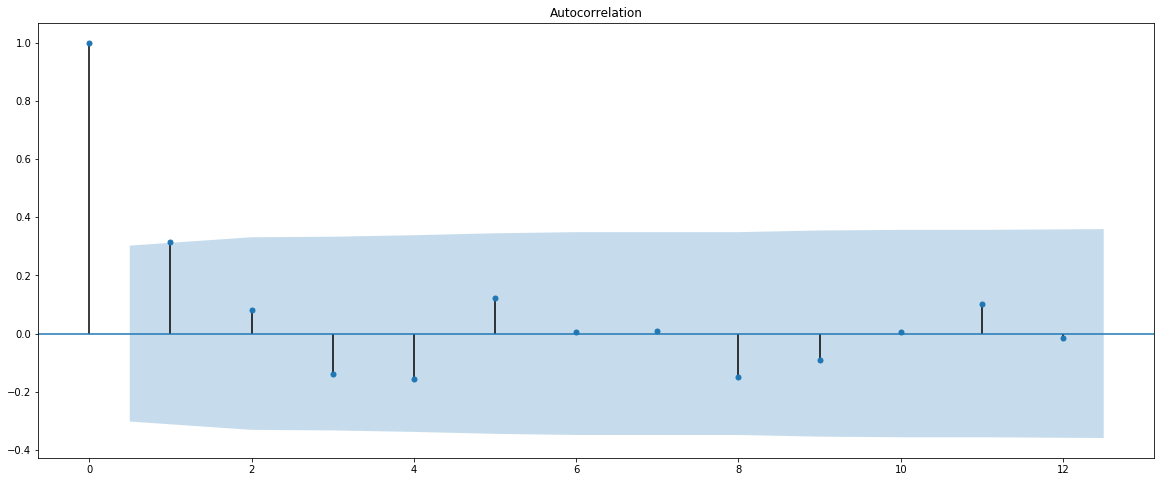

In [662]:
no_season_acf = plot_acf(no_season, lags=12)

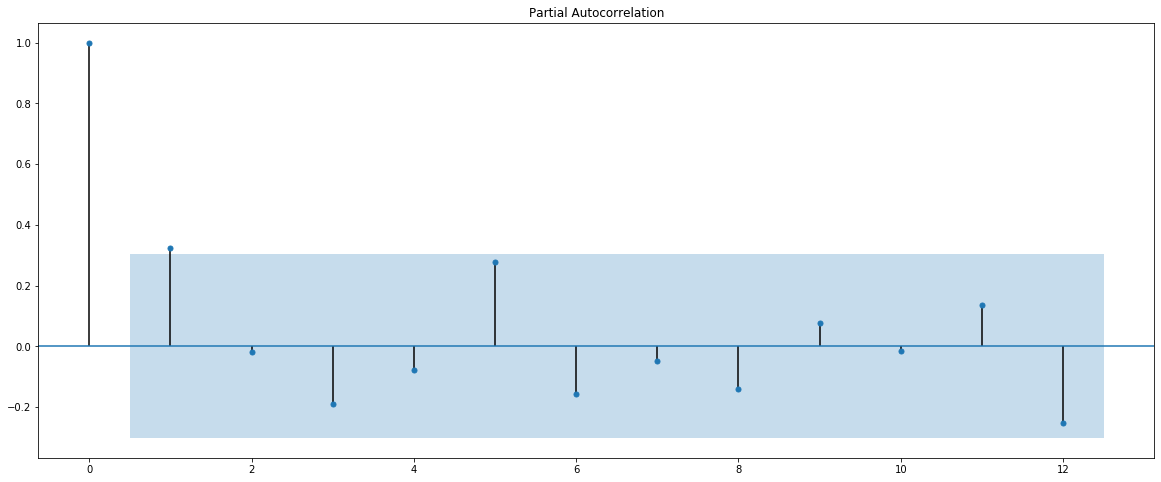

In [663]:
no_season_pacf = plot_pacf(no_season, lags=12)

#### We introduce a differencing term of one

In [665]:
train['year_lagged_mean_ovi'] = no_season.shift(12)
train['year_diff_mean_ovi'] = no_season- train.year_lagged_mean_ovi

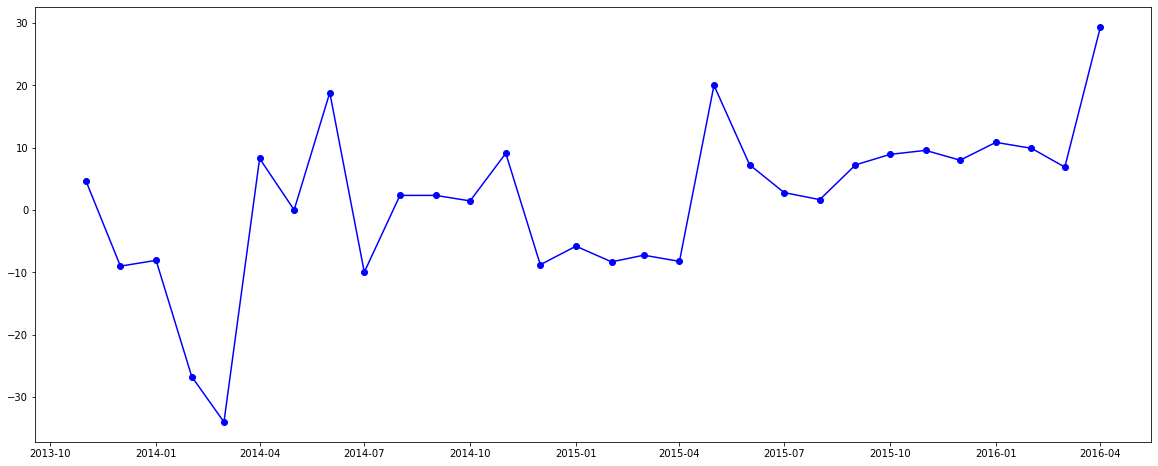

In [666]:
plt.plot(train.index, train.year_diff_mean_ovi, color = 'blue', label='real', marker = 'o')

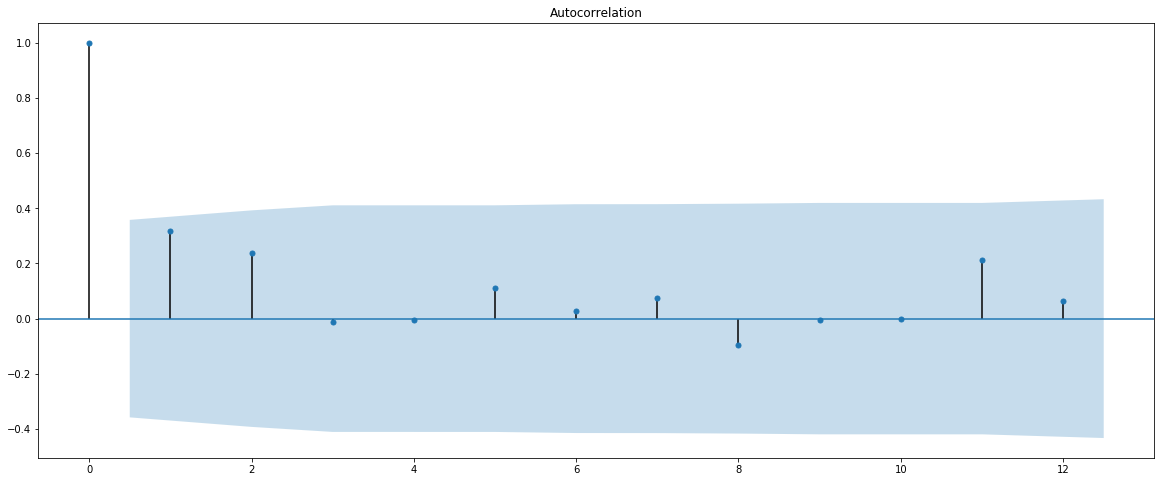

In [668]:
no_seson_diff_acf = plot_acf(train.year_diff_mean_ovi[12:], lags=12)

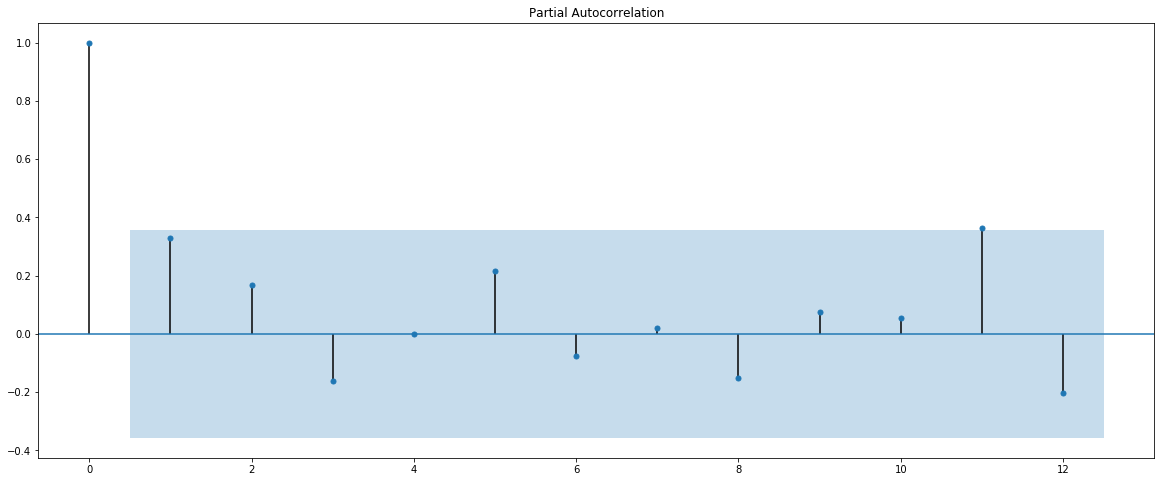

In [669]:
no_seson_diff_pacf = plot_pacf(train.year_diff_mean_ovi[12:], lags=12)

In [670]:
train.drop('pred', axis=1, inplace=True)
test.drop('pred', axis=1, inplace=True)
test = test.iloc[:12]

In [671]:
model = SARIMAX(train.mean_ovi, order=(11,1,0), seasonal_order=(1,0,0,12))
fit = model.fit()
pred = fit.predict(start = train.index[-1]+pd.DateOffset(months=1), end = test.index[-1])

In [672]:
train['pred'] = train.mean_ovi
test['pred']=pred
final_df = pd.concat([train, test]).sort_index()

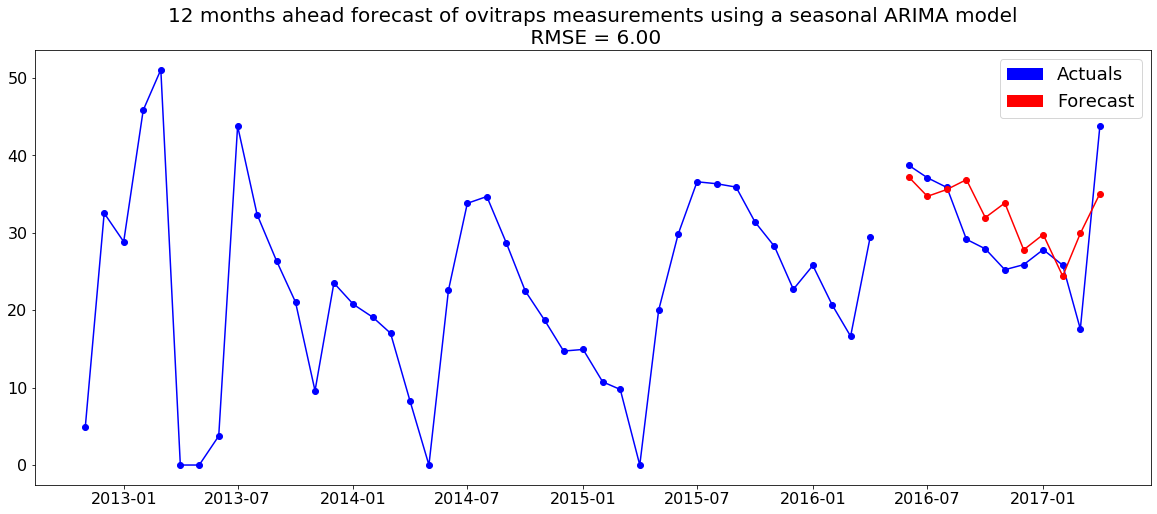

In [674]:
plt.plot(final.index, final.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(test.iloc[1:].index, test.iloc[1:].pred, color = 'red', label='prediction', marker = 'o')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Actuals', 'Forecast'], loc=1, ncol = 1, prop={'size':18})
l.draw_frame(True)
plt.title('12 months ahead forecast of ovitraps measurements using a seasonal ARIMA model\n RMSE = 6.00', fontdict={'fontsize':20})
plt.tick_params(axis='both', labelsize=16)

In [675]:
np.sqrt(mean_squared_error(test.iloc[1:].pred, test.iloc[1:].mean_ovi))

5.997519201786167

## Seasonal ARIMA with exogenous variables

In [677]:
mosq = pd.read_csv('../data/ovitrap_data_monthly_province.csv').sort_values(['adm_level', 'date'])
weather = pd.read_csv('../data/weather_data_monthly_province.csv')

In [679]:
mosq['date'] = pd.to_datetime(mosq.date).dt.date
weather['date'] = pd.to_datetime(weather['date']).dt.date

In [680]:
weather.rename(mapper={
    'JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRateGC':'jaxa_rainfall',
    'MODIS_006_MOD11A1_LST_Day_1km': 'land_surface_temperature_day',
    'MODIS_006_MYD13A1_EVI':'vegetation_index',
    'MODIS_006_MOD11A1_LST_Night_1km': 'land_surface_temperature_night',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg': 'specific_humidity',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Rainf_f_tavg': 'fldas_rainfall',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_SoilMoi00_10cm_tavg': 'soil_moisture',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_SoilTemp00_10cm_tavg': 'soil_temperature',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg': 'air_temperature',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg': 'wind_speed'
                      },
               axis=1,
               inplace=True)

In [681]:
mosq = weather.merge(mosq, on=['adm_level', 'date'], how='left')

In [682]:
mosq.loc[mosq.count_ovi>0].corr().sort_values('mean_ovi')

,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed,count_ovi,mean_ovi,error_ovi,error_relative_ovi
error_relative_ovi,-0.043448,0.019026,-0.043671,-0.080227,-0.141662,-0.091112,-0.124182,-0.035116,-0.090054,-0.071487,-0.239962,-0.421641,0.517092,1.000000
land_surface_temperature_day,-0.173665,1.000000,0.600960,-0.611760,0.281040,-0.115288,-0.172629,0.758672,0.542546,-0.316798,0.020088,-0.222230,-0.141915,0.019026
soil_temperature,-0.175397,0.758672,0.837801,-0.240100,0.530694,-0.101343,-0.245466,1.000000,0.872140,-0.022720,-0.036816,-0.133356,-0.093973,-0.035116
count_ovi,-0.010166,0.020088,-0.041350,-0.075432,-0.007945,-0.018656,0.030972,-0.036816,-0.045428,-0.024778,1.000000,-0.097539,-0.250023,-0.239962
land_surface_temperature_night,-0.125168,0.600960,1.000000,-0.087791,0.652772,-0.016092,-0.029635,0.837801,0.868089,-0.003427,-0.041350,-0.058370,-0.054209,-0.043671
air_temperature,0.015681,0.542546,0.868089,0.059572,0.790790,0.147189,0.048218,0.872140,1.000000,-0.047220,-0.045428,-0.003180,-0.038749,-0.090054
jaxa_rainfall,1.000000,-0.173665,-0.125168,0.047291,0.338619,0.783256,0.477639,-0.175397,0.015681,-0.007207,-0.010166,0.038549,0.015482,-0.043448
wind_speed,-0.007207,-0.316798,-0.003427,0.074622,-0.012287,0.069932,-0.002745,-0.022720,-0.047220,1.000000,-0.024778,0.067094,0.025556,-0.071487
specific_humidity,0.338619,0.281040,0.652772,0.087972,1.000000,0.510197,0.521520,0.530694,0.790790,-0.012287,-0.007945,0.083817,-0.013353,-0.141662
fldas_rainfall,0.783256,-0.115288,-0.016092,-0.021826,0.510197,1.000000,0.625907,-0.101343,0.147189,0.069932,-0.018656,0.115017,0.023887,-0.091112


In [683]:
df = mosq.loc[(mosq.adm_level == 'Pangasinan')&(mosq.count_ovi>0)].reset_index()
df.rename(mapper={'index':'old_index'}, axis=1, inplace=True)
train = df.iloc[1:43].set_index('date')
test = df[43:54].set_index('date')

In [684]:
temp_df =  (
    mosq.loc[(mosq.adm_level == 'Pangasinan')].reset_index()
    .rename(mapper={'index':'old_index'}, axis=1)
)
empty = (
    temp_df
    .loc[temp_df.old_index == 5261]
    .set_index('date')
)

In [685]:
empty

,old_index,adm_level,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed,count_ovi,mean_ovi,error_ovi,error_relative_ovi
date,,,,,,,,,,,,,,,,
2016-05-01,5261,Pangasinan,0.102047,15468.959,14878.453,3744.314,0.017385,0.00008,0.294611,302.86682,301.79465,2.731993,0.0,NaN,NaN,NaN


In [687]:
test

,old_index,adm_level,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed,count_ovi,mean_ovi,error_ovi,error_relative_ovi
date,,,,,,,,,,,,,,,,
2016-06-01,5262,Pangasinan,0.102457,15249.828,14869.996,4375.1260,0.018207,0.000080,0.364369,300.35715,300.86258,3.169702,18.0,38.737222,7.317981,0.188913
2016-07-01,5263,Pangasinan,0.218321,15225.910,14848.388,4501.4214,0.018308,0.000147,0.405412,299.68823,300.47390,3.031964,56.0,37.109107,3.268787,0.088086
2016-08-01,5264,Pangasinan,0.505584,15116.484,14621.961,4209.7840,0.019144,0.000316,0.435354,298.95166,299.73276,4.796396,83.0,35.852651,2.759772,0.076975
2016-09-01,5265,Pangasinan,0.179955,15115.336,14790.981,4952.9355,0.018598,0.000133,0.428863,298.89746,299.85260,3.344808,120.0,29.157500,2.256699,0.077397
2016-10-01,5266,Pangasinan,0.252533,15183.737,14861.166,4134.8853,0.018244,0.000156,0.425390,298.68018,299.70493,4.138332,112.0,27.926964,2.212454,0.079223
2016-11-01,5267,Pangasinan,0.026626,15204.100,14788.573,3901.7568,0.016592,0.000012,0.367379,298.73422,299.59506,3.265768,111.0,25.230541,2.173273,0.086137
2016-12-01,5268,Pangasinan,0.021966,15198.502,14785.183,4215.1630,0.016600,0.000013,0.310224,298.95322,299.20163,3.268988,50.0,25.885200,3.336974,0.128914
2017-01-01,5269,Pangasinan,0.012297,15124.771,14730.371,4072.8271,0.014646,0.000003,0.247705,298.47922,297.86905,3.683128,51.0,27.825098,3.361432,0.120806
2017-02-01,5270,Pangasinan,0.015153,15172.563,14725.263,3730.2102,0.014359,0.000003,0.206014,298.99548,297.51120,3.611112,56.0,25.811429,2.497501,0.096760


### Gridsearch for exogenous regressors

In [692]:
full_list = ['vegetation_index', 'soil_moisture', 'fldas_rainfall', 'specific_humidity', 'land_surface_temperature_day',
             'wind_speed', 'land_surface_temperature_night', 'soil_temperature', 'air_temperature']

In [699]:
all_possible_combinations = list(itertools.combinations(full_list, 1))
all_possible_combinations+=list(itertools.combinations(full_list, 2))
all_possible_combinations+=list(itertools.combinations(full_list, 3))
all_possible_combinations+=list(itertools.combinations(full_list, 4))

In [700]:
all_possible_combinations

[('vegetation_index',),
 ('soil_moisture',),
 ('fldas_rainfall',),
 ('specific_humidity',),
 ('land_surface_temperature_day',),
 ('wind_speed',),
 ('land_surface_temperature_night',),
 ('soil_temperature',),
 ('air_temperature',),
 ('vegetation_index', 'soil_moisture'),
 ('vegetation_index', 'fldas_rainfall'),
 ('vegetation_index', 'specific_humidity'),
 ('vegetation_index', 'land_surface_temperature_day'),
 ('vegetation_index', 'wind_speed'),
 ('vegetation_index', 'land_surface_temperature_night'),
 ('vegetation_index', 'soil_temperature'),
 ('vegetation_index', 'air_temperature'),
 ('soil_moisture', 'fldas_rainfall'),
 ('soil_moisture', 'specific_humidity'),
 ('soil_moisture', 'land_surface_temperature_day'),
 ('soil_moisture', 'wind_speed'),
 ('soil_moisture', 'land_surface_temperature_night'),
 ('soil_moisture', 'soil_temperature'),
 ('soil_moisture', 'air_temperature'),
 ('fldas_rainfall', 'specific_humidity'),
 ('fldas_rainfall', 'land_surface_temperature_day'),
 ('fldas_rainfall

In [701]:
for l in all_possible_combinations:
    sarima_model = SARIMAX(train.mean_ovi,exog = train[list(l)], order=(11,1,0), seasonal_order=(1,0,0,12))
    sarima_fit = sarima_model.fit()
    pred = sarima_fit.predict(exog=pd.concat([empty, test])[list(l)], start = train.index[-1]+pd.DateOffset(months=1), end = test.index[-1])
    test['pred']=pred[1:]
    if np.sqrt(mean_squared_error(test.pred, test.mean_ovi))<5.5:
        print(l, np.sqrt(mean_squared_error(test.pred, test.mean_ovi)))

('specific_humidity', 'land_surface_temperature_day', 'soil_temperature') 5.230996571841705
('land_surface_temperature_day', 'wind_speed', 'soil_temperature') 5.156947547129581
('land_surface_temperature_day', 'soil_temperature', 'air_temperature') 5.256394392442227
('land_surface_temperature_night', 'soil_temperature', 'air_temperature') 5.329857574038563
('soil_moisture', 'fldas_rainfall', 'land_surface_temperature_day', 'soil_temperature') 5.07566353385504
('soil_moisture', 'specific_humidity', 'land_surface_temperature_day', 'soil_temperature') 5.395396087219669
('fldas_rainfall', 'specific_humidity', 'land_surface_temperature_day', 'soil_temperature') 5.34522482285596
('fldas_rainfall', 'land_surface_temperature_day', 'wind_speed', 'soil_temperature') 5.281611947771095
('fldas_rainfall', 'land_surface_temperature_day', 'soil_temperature', 'air_temperature') 5.425736075549008
('specific_humidity', 'land_surface_temperature_day', 'wind_speed', 'soil_temperature') 5.232863342295389


# Final model - seasonal ARIMA with soil moisture, rainfall, land surface temperature and soil temperature as etra regressors

In [686]:
sarima_model = SARIMAX(train.mean_ovi,exog = train[['soil_moisture', 'fldas_rainfall', 'land_surface_temperature_day', 'soil_temperature']], order=(11,1,0), seasonal_order=(1,0,0,12))
sarima_fit = sarima_model.fit()
pred = sarima_fit.predict(exog=pd.concat([empty, test])[['soil_moisture', 'fldas_rainfall', 'land_surface_temperature_day', 'soil_temperature']], start = train.index[-1]+pd.DateOffset(months=1), end = test.index[-1])

In [688]:
train['pred'] = train.mean_ovi
empty['pred'] = pred[0]
test['pred']=pred[1:]
final_df = pd.concat([train, empty, test]).sort_index()

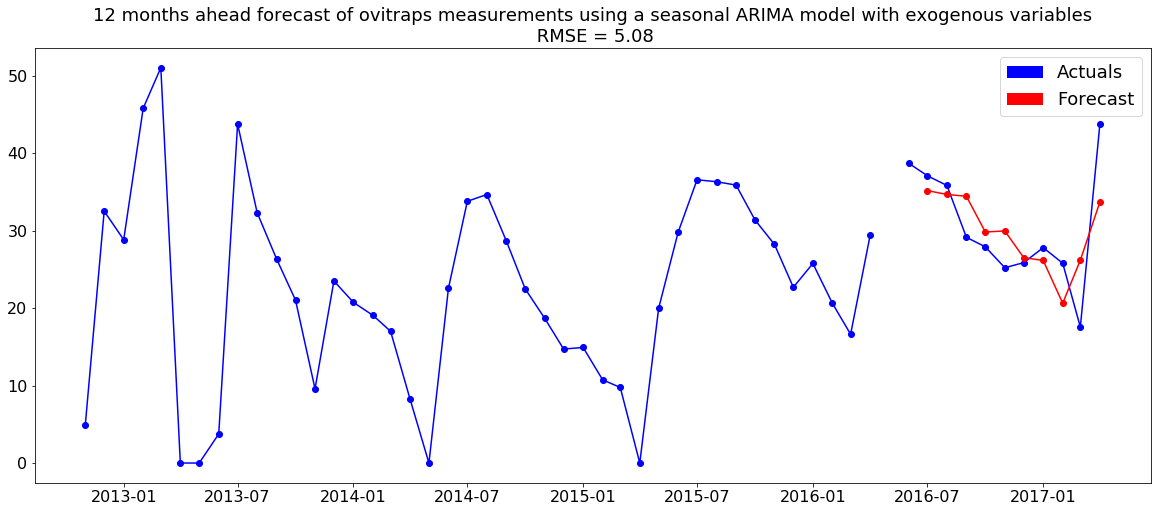

In [689]:
plt.plot(final_df.index, final_df.mean_ovi, color = 'blue', label='real', marker = 'o')
plt.plot(test.iloc[1:].index, test.iloc[1:].pred, color = 'red', label='prediction', marker = 'o')
topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='red',  edgecolor = 'none')
l = plt.legend([topbar, bottombar], ['Actuals', 'Forecast'], loc=1, ncol = 1, prop={'size':18})
l.draw_frame(True)
plt.title('12 months ahead forecast of ovitraps measurements using a seasonal ARIMA model with exogenous variables\n RMSE = 5.08', fontdict={'fontsize':18})
plt.tick_params(axis='both', labelsize=16)

In [690]:
np.sqrt(mean_squared_error(test.pred, test.mean_ovi))

5.07566353385504